In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [2]:

crop_data = pd.read_csv(r"C:\Users\fastf\Downloads\crop_production.csv")

In [3]:
crop_data.head(4)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0


In [4]:
crop_data.shape

(246091, 7)

In [5]:
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [6]:
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [7]:
crop_data.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [8]:
crop_data.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [9]:
crop_data.drop('State_Name', axis =1,inplace = True)

In [10]:
crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10) 

,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
5,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,3583.223250
6,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0,2.777778
7,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,2.000000
8,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0,3.000000
9,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0,4.225000


In [11]:
crop_data.isnull().sum()

District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
Yield            3730
dtype: int64

In [12]:
crop_data = crop_data.dropna()

In [13]:
crop_data.isnull().any()

District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production       False
Yield            False
dtype: bool

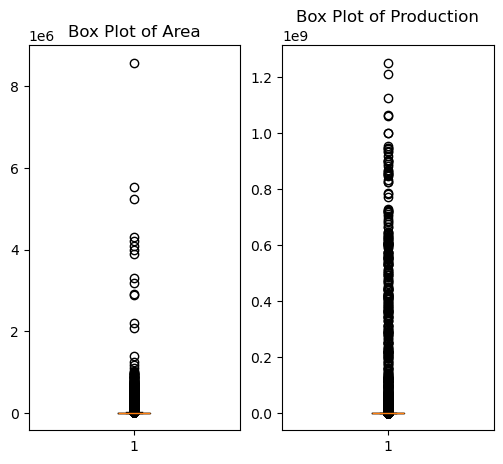

In [14]:
plt.figure(figsize =(6,5))
plt.subplot(1,2,1)
plt.boxplot(crop_data['Area'])
plt.title('Box Plot of Area')
plt.subplot(1,2,2)
plt.boxplot(crop_data['Production'])
plt.title('Box Plot of Production')
plt.show()
            

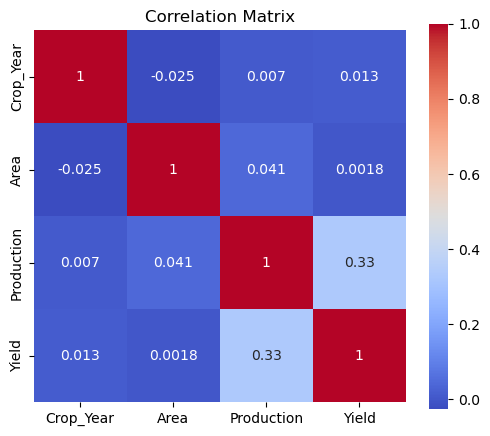

In [15]:
import seaborn as sns
corr_matrix = crop_data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [16]:
#split features and labels


In [17]:
x = crop_data.drop('Yield', axis=1)
y = crop_data['Yield']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [18]:
print(x_train.dtypes)


District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = crop_data.drop('Yield', axis=1)
y = crop_data['Yield']
x_encoded = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
dt_r2 = r2_score(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("Decision Tree RSQUARE Score:", dt_r2)
print("Decision Tree RMSE:", dt_rmse)


Decision Tree RSQUARE Score: 0.9421974211702162
Decision Tree RMSE: 176.8327415807382


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ann_model = Sequential([
    Dense(64, input_dim=x_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1) 
])

ann_model.compile(optimizer='adam', loss='mse')
history = ann_model.fit( x_train_scaled, y_train, epochs=100, batch_size=16,validation_data=(x_test_scaled, y_test),verbose=1)
y_pred_ann = ann_model.predict(x_test_scaled).flatten()

print("ANN RSquare:", r2_score(y_test, y_pred_ann))
print("ANN RMSE:", mean_squared_error(y_test, y_pred_ann, squared=False))

C:\Users\fastf\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
12118/12118 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 556672.0000 - val_loss: 333583.2812
Epoch 2/100
12118/12118 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 408542.7188 - val_loss: 293414.8750
Epoch 3/100
12118/12118 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 467297.9688 - val_loss: 278936.3438
Epoch 4/100
12118/12118 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 535926.1875 - val_loss: 270460.0938
Epoch 5/100
12118/12118 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 448163.1562 - val_loss: 263183.5625
Epoch 6/100
12118/12118 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 580069.7500 - val_loss: 263772.9688
Epoch 7/100
12118/12118 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 502744.1875 - val_loss: 255569.5156
Epoch 8/100
12118/12118 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 356928.4375 - val_loss: 251959.1406
Epoch 9/100
12118/12118 ━━━━━━━━━━━━━━━━━━━━ 181s 15ms/step - loss: 440216.6250 - val_loss: 249595.7344
Epoch 10/100
12118/12118 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 422029.6562 -

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:

ann_model.save("ann_crop_yield_model.h5")


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

gb_r2 = r2_score(y_test, y_pred_gb)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
